https://www.docin.com/p-387771991.html

# 根轨迹法

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# 传递函数 G(s) = 1 / ((10s + 1)(5s + 1)(2s + 1))
num = [1]
den = [10*5*2, 10*5+10*2+5*2, 10+5+2, 1]
system = ctrl.TransferFunction(num, den)

# 离散化系统
sampling_time = 0.1  # 采样时间
discrete_system = ctrl.sample_system(system, sampling_time)


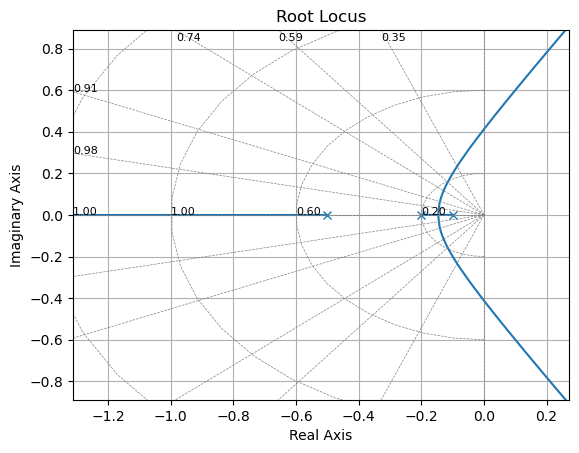

Calculated Ku: 0.08794197467430998


In [71]:
# 绘制根轨迹图
plt.figure()
rlist, klist = ctrl.root_locus(system, Plot=True)
plt.title("Root Locus")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid(True)
plt.show()

# 查找跨越虚轴的增益值
Ku = None
for i in range(len(rlist[0])):
    poles = [pole[i] for pole in rlist]
    if any(pole.real >= 0 for pole in poles):
        Ku = klist[i]
        break

print(f"Calculated Ku: {Ku}")


In [72]:
# 查找对应的临界周期 Pu
if Ku is not None:
    closed_loop_system = ctrl.feedback(Ku * system)
    poles = ctrl.pole(closed_loop_system)
    # 找到具有最大虚部的极点，振荡周期为 2*pi/ImaginaryPart
    max_imaginary_pole = max(poles, key=lambda p: p.imag)
    Pu = 2 * np.pi / max_imaginary_pole.imag
    print(f"Calculated Pu: {Pu}")
else:
    print("Ku not found, cannot calculate Pu.")


Calculated Pu: 1687210546.7897954


In [73]:
# 根据Ziegler-Nichols方法计算PID参数
if Ku is not None and Pu is not None:
    Kp = 0.6 * Ku
    Ti = Pu / 2
    Td = Pu / 8
    Ki = Kp / Ti
    Kd = Kp * Td

    print(f"PID参数：Kp={Kp}, Ki={Ki}, Kd={Kd}")
else:
    print("无法计算 PID 参数，因为 Ku 或 Pu 未找到。")


PID参数：Kp=0.05276518480458598, Ki=6.254724391686705e-11, Kd=11128247.038201265


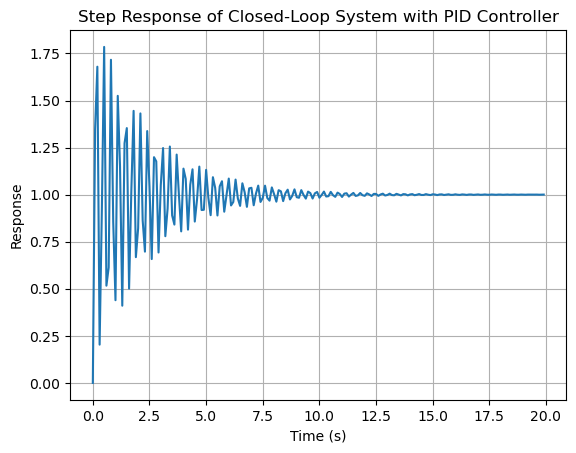

In [74]:
# 设计PID控制器
if Ku is not None and Pu is not None:
    pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

    # 闭环系统
    closed_loop_system = ctrl.feedback(pid_controller * system)

    # 仿真
    time = np.arange(0, 20, 0.1)
    t, y = ctrl.step_response(closed_loop_system, T=time)

    # 绘图
    plt.plot(t, y)
    plt.title("Step Response of Closed-Loop System with PID Controller")
    plt.xlabel("Time (s)")
    plt.ylabel("Response")
    plt.grid()
    plt.show()
else:
    print("无法进行闭环仿真，因为 Ku 或 Pu 未找到。")

# 离散化系统

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import math

# 定义传递函数 G(s) = 1 / ((10s + 1)(5s + 1)(2s + 1))
num = [1]
den = [10*5*2, 10*5 + 10*2 + 5*2, 10 + 5 + 2, 1]
G_s = ctrl.TransferFunction(num, den)

# 选择采样时间
T = 0.1  # 采样时间，单位为秒，可以根据实际情况调整

# 将连续系统离散化
G_z = ctrl.sample_system(G_s, T, method='zoh')
print(G_z)



1.634e-06 z^2 + 6.406e-06 z + 1.57e-06
--------------------------------------
  z^3 - 2.921 z^2 + 2.845 z - 0.9231

dt = 0.1



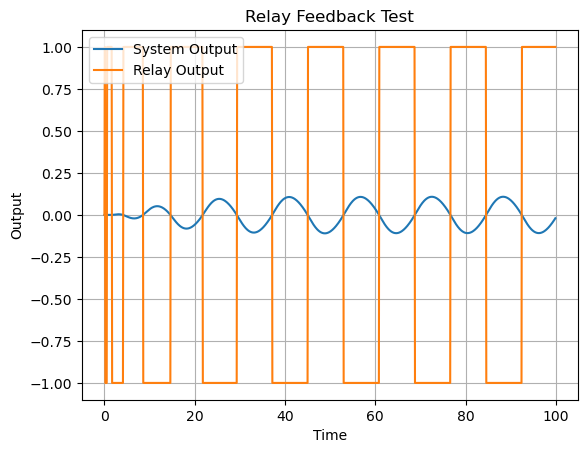

In [217]:
# 继电器参数
h = 1  # 继电器幅度

# 初始化变量
time_steps = int(00 / T)
t = np.arange(0, 100, T)
y = np.zeros_like(t)
u = np.zeros_like(t)
e = np.zeros_like(t)
r = np.zeros_like(t)

# 继电器输出初始值
u[0] = 0

# 迭代模拟
for i in range(1, len(t)):
    _, y_out = ctrl.forced_response(G_z, T=t[:i+1], U=u[:i+1])
    y[i] = y_out[-1]  # 离散系统响应
    e[i] = r[i] - y[i]  # 误差
    u[i] = h if e[i] >= 0 else -h  # 继电器输出

# 绘图
plt.plot(t, y, label='System Output')
plt.plot(t, u, label='Relay Output')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Relay Feedback Test')
plt.grid()
plt.show()

In [228]:
np.where(u == 1)

(array([  1,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
        182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 294, 295, 296,
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
        310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
        323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
        336, 337, 338, 339, 340, 341, 342, 343, 344

In [227]:
# 假设测量出的临界周期和临界增益为
T_u = 16
K_u = 4*h/(math.pi*max(y))

K_p = 0.6 * K_u
T_i = 0.5 * T_u
T_d = 0.12 * T_u

print(f'PID参数：Kp={K_p}, Ti={T_i}, Td={T_d}')


PID参数：Kp=7.062174880996169, Ti=8.0, Td=1.92


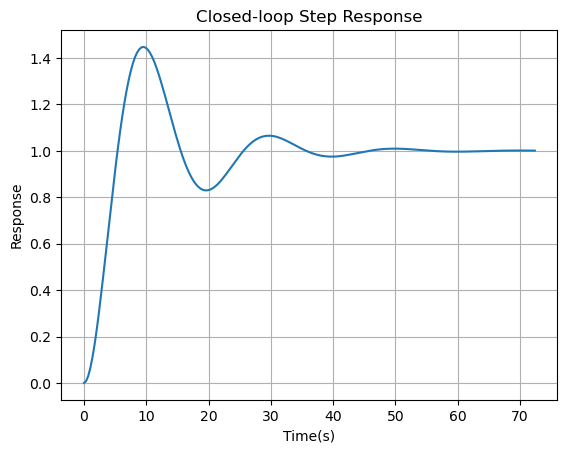

In [230]:
# 定义PID控制器
K_i = K_p / T_i
K_d = K_p * T_d

C = ctrl.TransferFunction([K_d, K_p, K_i], [1, 0])

# 闭环系统
T_sys = ctrl.feedback(C * G_s)

# 测试响应
t, y = ctrl.step_response(T_sys)
plt.plot(t, y)
plt.xlabel('Time(s)')
plt.ylabel('Response')
plt.title('Closed-loop Step Response')
plt.grid()
plt.show()


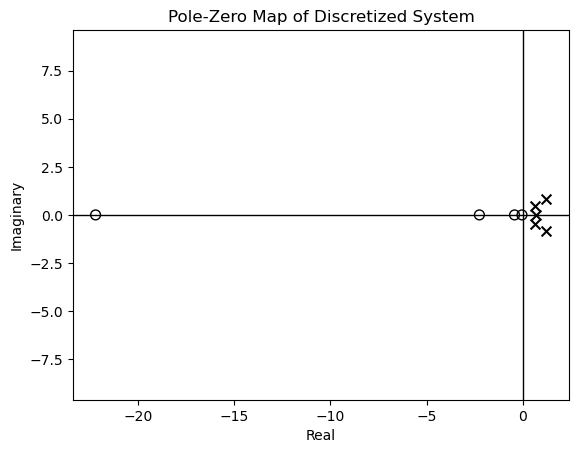

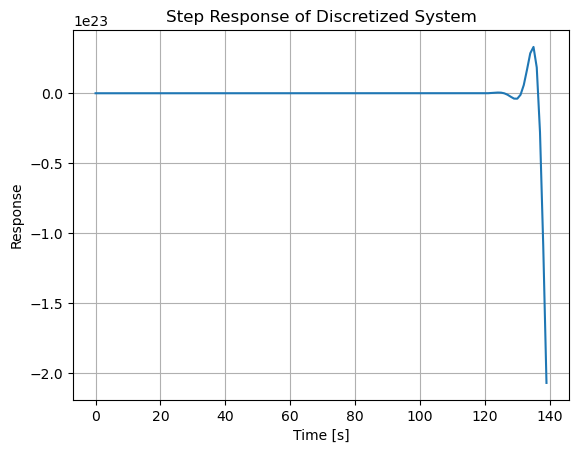

In [176]:
import control as ctrl
import matplotlib.pyplot as plt

# 定义连续系统传递函数
num = [1]
den = [10, 1, 5, 1, 2, 1]
G_s = ctrl.TransferFunction(num, den)

# 选择采样时间
T = 1  # 采样时间，单位为秒，可以根据实际情况调整

# 将连续系统离散化
G_z = ctrl.sample_system(G_s, T, method='zoh')

# 绘制零极点图
plt.figure()
ctrl.pzmap(G_z, Plot=True, title='Pole-Zero Map of Discretized System')
plt.show()

# 绘制离散系统的阶跃响应图
plt.figure()
t, y = ctrl.step_response(G_z)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Response')
plt.title('Step Response of Discretized System')
plt.grid()
plt.show()


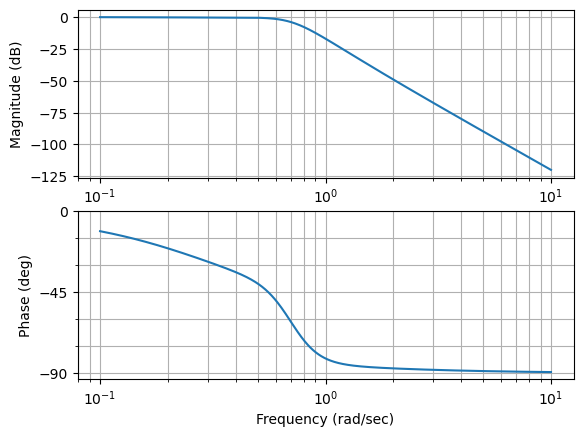

In [177]:
# 绘制连续系统的 Bode 图
mag, phase, omega = ctrl.bode(G_s, dB=True, Hz=False, deg=True, Plot=True)

# 显示图像
plt.show()

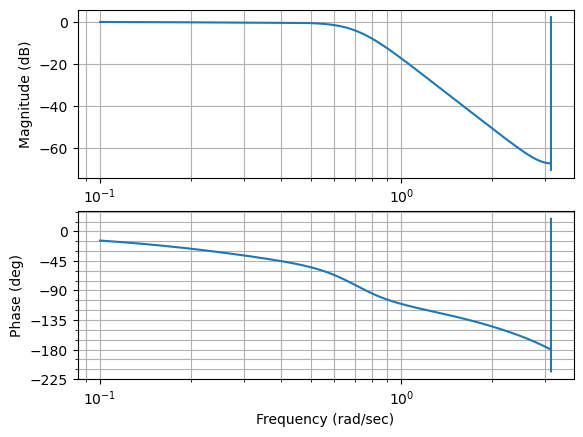

In [122]:
# 绘制离散系统的 Bode 图
mag, phase, omega = ctrl.bode(G_z, dB=True, Hz=False, deg=True, Plot=True)

# 显示图像
plt.show()
